In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install wordcloud
# from wordcloud import WordCloud

# Data Cleaning and EDA

In [2]:
file_path = 'data6.csv'
df = pd.read_csv(file_path)

In [3]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

Dataset Shape: (2720, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2720 non-null   int64 
 1   title         2720 non-null   object
 2   link          2720 non-null   object
 3   content       2653 non-null   object
 4   gold_label    2720 non-null   object
 5   news_channel  2720 non-null   object
dtypes: int64(1), object(5)
memory usage: 127.6+ KB
None

Descriptive Statistics for Numerical Columns:
                id
count  2720.000000
mean   1030.675368
std     735.447784
min       0.000000
25%     315.750000
50%     995.500000
75%    1675.250000
max    2355.000000


In [4]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
id               0
title            0
link             0
content         67
gold_label       0
news_channel     0
dtype: int64


In [5]:
print("\After Dropping Missing Values per Column:")
df = df.dropna()
print(df.isnull().sum())
df.shape

\After Dropping Missing Values per Column:
id              0
title           0
link            0
content         0
gold_label      0
news_channel    0
dtype: int64


(2653, 6)

In [6]:
print("\nUnique Values in Each Categorical Column:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Categorical Column:
title: 1183 unique values
link: 1186 unique values
content: 1186 unique values
gold_label: 12 unique values
news_channel: 5 unique values


In [7]:
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


In [8]:
label_mapping = {
    'sports': 'Sports',
    'Sport': 'Sports',
    'Sports': 'Sports',
    'business': 'Business',
    'Business': 'Business',
    'science-technology': 'Science-Technology',
    'Tech': 'Science-Technology',
    'Health-science': 'Science-Technology',
    'entertainment': 'Entertainment',
    'Entertainment': 'Entertainment',
    'world': 'International',
    'World': 'International',
    'Pakistan': 'Pakistan'  # YE WALA HATA DENA
}

df['gold_label'] = df['gold_label'].map(label_mapping)

print("Updated Unique Values in 'gold_label':")
print(df['gold_label'].unique())

Updated Unique Values in 'gold_label':
['Entertainment' 'Business' 'Sports' 'Science-Technology' 'International'
 'Pakistan']


In [9]:
# Drop the news channel column cus final mein woh nahi chahiye
df = df[df["gold_label"] != "Pakistan"]

In [10]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

Dataset Shape: (2401, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2401 entries, 0 to 2719
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2401 non-null   int64 
 1   title         2401 non-null   object
 2   link          2401 non-null   object
 3   content       2401 non-null   object
 4   gold_label    2401 non-null   object
 5   news_channel  2401 non-null   object
dtypes: int64(1), object(5)
memory usage: 131.3+ KB
None

Descriptive Statistics for Numerical Columns:
                id
count  2401.000000
mean   1041.568930
std     776.156379
min       0.000000
25%     248.000000
50%     903.000000
75%    1755.000000
max    2355.000000


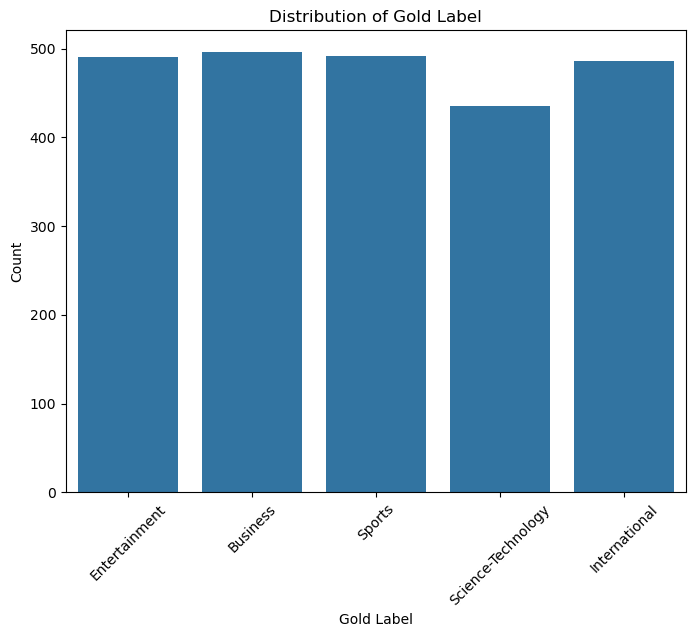

In [11]:
# Distribution of 'gold_label'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gold_label')
plt.title('Distribution of Gold Label')
plt.xlabel('Gold Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

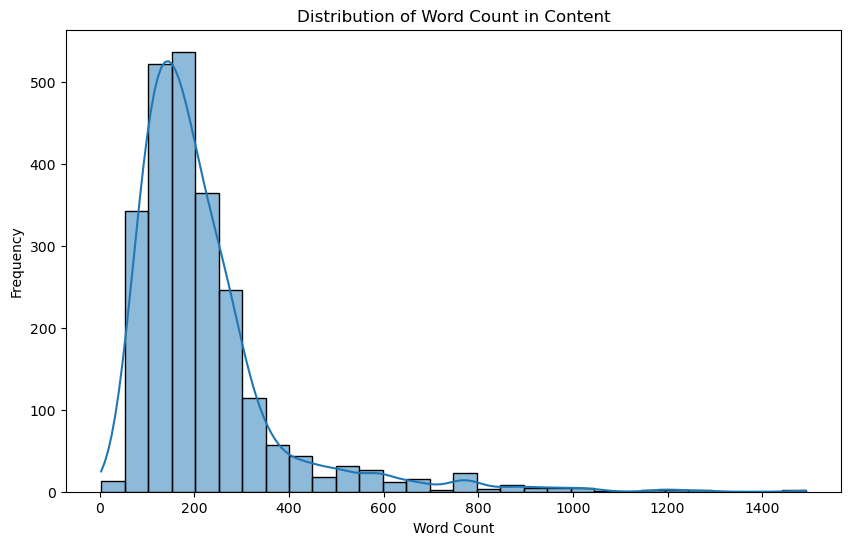

In [12]:
# gpt 
df['content_word_count'] = df['content'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(df['content_word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count in Content')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

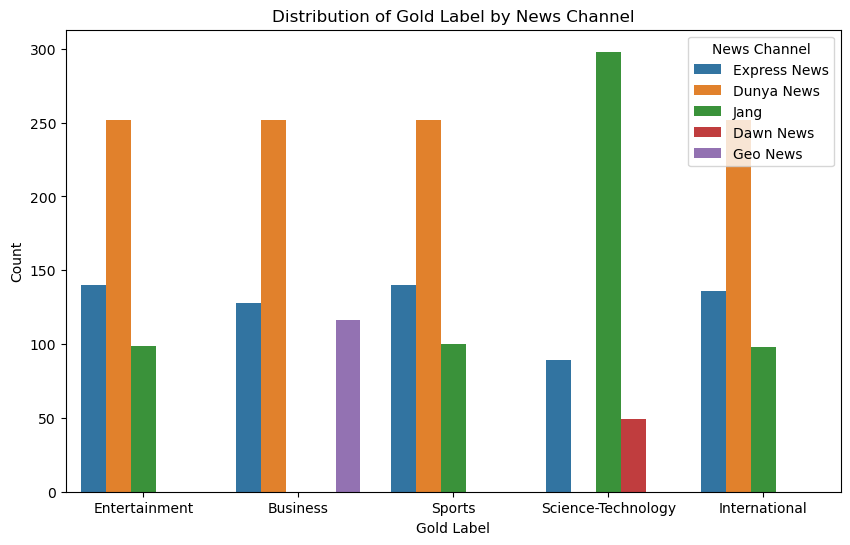

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gold_label', hue='news_channel')
plt.xlabel('Gold Label')
plt.ylabel('Count')
plt.title('Distribution of Gold Label by News Channel')
plt.legend(title='News Channel', loc='upper right')
plt.show()

In [14]:
# dataset with no redundant columns
final_df = df.drop(columns=['news_channel', 'content_word_count'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2401 entries, 0 to 2719
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2401 non-null   int64 
 1   title       2401 non-null   object
 2   link        2401 non-null   object
 3   content     2401 non-null   object
 4   gold_label  2401 non-null   object
dtypes: int64(1), object(4)
memory usage: 112.5+ KB


In [15]:
final_df.to_csv('data6cleaned.csv', index=False)